In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [30]:
# data = pd.read_csv(os.path.join('data', 'car', 'normal', 'ford.csv'))
# X = data['mileage'][:50] / 10000
# y = data['price'][:50] / 10000

data = pd.read_csv(os.path.join('data', 'house_price.txt'), names=['size', 'price'])
X = data['size']
y = data['price']
m = len(X)

X = (np.array(X)).reshape(m, 1)
y = (np.array(y)).reshape(m, 1)

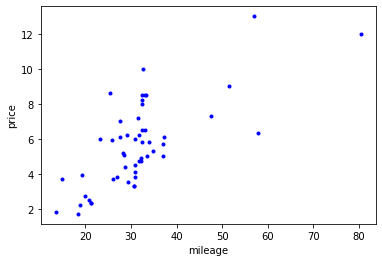

In [31]:
plt.plot(X[:m], y[:m], 'b.')
plt.xlabel('mileage')
plt.ylabel('price')
plt.show()

In [32]:
def ComputeJ(t0, t1, X, y):
    m = len(X)
    X_b = np.c_[np.ones((m, 1)), X]
    theta = np.array([t0, t1])

    cost_vector = np.dot(X_b, theta) - y
    cost_vector = cost_vector.reshape(-1)

    cost2 = np.square(cost_vector)
    cost_sum = np.sum(cost2) / (2 * m)

    return cost_sum

def featureNormalize(X):
    mu = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    X_norm = (X - mu) / std
    return X_norm, mu, std

def featureNorm_max(X):
    X_norm = X / X.max()
    return X_norm

def plotting(itr_arr, cost_arr, label):
    plt.plot(itr_arr, cost_arr)
    plt.title(label)
    plt.xlabel('number of iterations')
    plt.ylabel('cost J')
    plt.show()

In [33]:
# Manual Gradient Descent
def Regression(X, y, lr, n_epoch, label):
    m = len(X)
    X_b = np.c_[np.ones((m, 1)), X]
    print(X_b.shape)

    theta = np.zeros((2, 1))
    gradients = np.zeros((2, 1))

    itr_arr = []
    cost_arr = []

    for i in range(n_epoch):
        gradients = np.dot(np.transpose(X_b), np.dot(X_b, theta) - y) / m
        num = lr * gradients
        theta = theta - num

        cost = ComputeJ(*theta, X = X, y = y)
        cost_arr.append(cost)
        itr_arr.append(i)
    print('theta:\n', theta)
    plotting(itr_arr, cost_arr, label)
    return theta

In [34]:
normed_X, mu, std = featureNormalize(X)

In [35]:
max_X = featureNorm_max(X)

(52, 2)
theta:
 [[5.62009181e-06]
 [1.96382768e-04]]


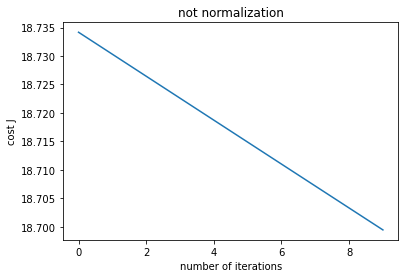

In [36]:
theta = []
theta.append(Regression(X, y, lr = 0.0000001, n_epoch = 10, label = 'not normalization'))

(52, 2)
theta:
 [[5.62285389e-08]
 [1.96480555e-06]]


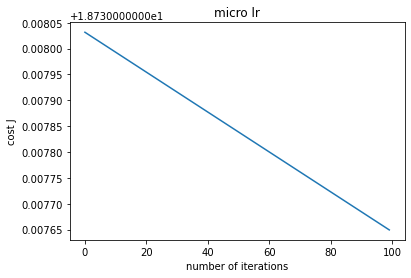

In [37]:
theta.append(Regression(X, y, lr = 0.0000000001, n_epoch = 100, label = 'micro lr')) 

(52, 2)
theta:
 [[5.5201038 ]
 [1.69254859]]


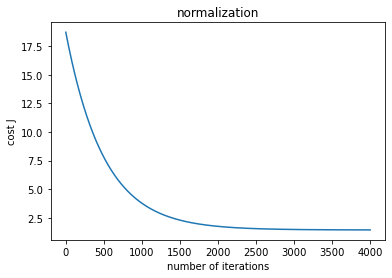

In [24]:
theta.append(Regression(normed_X, y, 0.001, 4000, label = 'normalization'))

(52, 2)
theta:
 [[2.89310509]
 [7.03560731]]


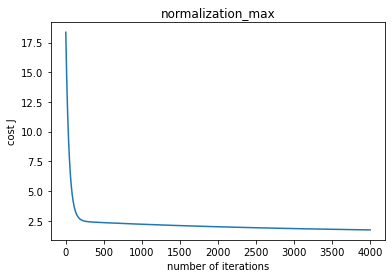

In [25]:
theta.append(Regression(max_X, y, 0.01, 4000, label = 'normalization_max'))

In [26]:
theta

[array([[5.62009181e-06],
        [1.96382768e-04]]),
 array([[5.62285389e-08],
        [1.96480555e-06]]),
 array([[5.5201038 ],
        [1.69254859]]),
 array([[2.89310509],
        [7.03560731]])]

In [27]:
def predict(mileage, theta):
    sample = []
    if type(mileage) != type(sample):
        mileage = [mileage]
    X_new = np.array([mileage])
    X_new_b = np.vstack([np.ones_like(X_new), X_new])
    print(X_new_b.shape)
    y_predict = [X_new_b.dot(theta)]
    return y_predict[0]


In [28]:
y_predicts = []
for i in theta:
    want_predict = [X.min(), X.max()]
    y_predicts.append(predict(want_predict, i))
y_predicts

(2, 2)
(2, 2)
(2, 2)
(2, 2)


[array([[0.000202  ],
        [0.01584677]]),
 array([[2.02103409e-06],
        [1.58546593e-04]]),
 array([[  7.21265239],
        [211.19092348]]),
 array([[  9.9287124 ],
        [604.43201982]])]

In [41]:
plt.plot(want_predict, y_predicts[4], 'r-')
plt.plot(X, y, 'b.')
#plt.ylim(0, 6)
plt.show()

IndexError: list index out of range